#### Import the Libraries

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#### Read the dataset

In [7]:
df = pd.read_csv('TaxiFare.csv',parse_dates=[2])
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1


In [8]:
df.dtypes
# df['date_time_of_pickup'] = pd.to_datetime(df['date_time_of_pickup'])

unique_id                            object
amount                              float64
date_time_of_pickup     datetime64[ns, UTC]
longitude_of_pickup                 float64
latitude_of_pickup                  float64
longitude_of_dropoff                float64
latitude_of_dropoff                 float64
no_of_passenger                       int64
dtype: object

In [9]:
df.shape

(50000, 8)

### Data Preprocessing

#### 1) Handling Null Values

In [10]:
df.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

#### 2) Handling Duplicates Values

In [12]:
df.duplicated().sum()

0

#### 3) Check data types

In [13]:
df.dtypes

unique_id                            object
amount                              float64
date_time_of_pickup     datetime64[ns, UTC]
longitude_of_pickup                 float64
latitude_of_pickup                  float64
longitude_of_dropoff                float64
latitude_of_dropoff                 float64
no_of_passenger                       int64
dtype: object

In [14]:
df.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


#### Chcek the target Variable

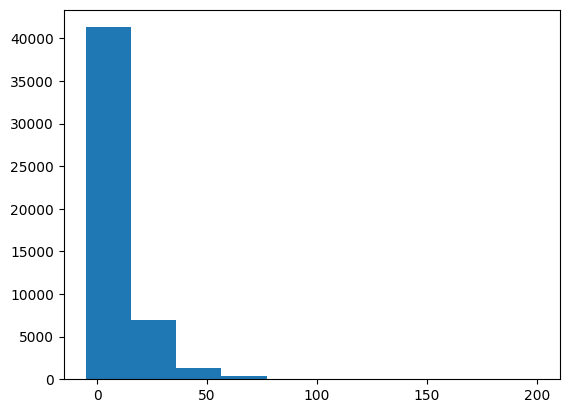

In [15]:
plt.hist(df['amount'])
plt.show()

In [20]:
df[df['amount']<=0].shape

(9, 8)

In [21]:
df1 = df.copy()

In [23]:
df = df[df['amount']>0]
print(df.shape)

(49991, 8)


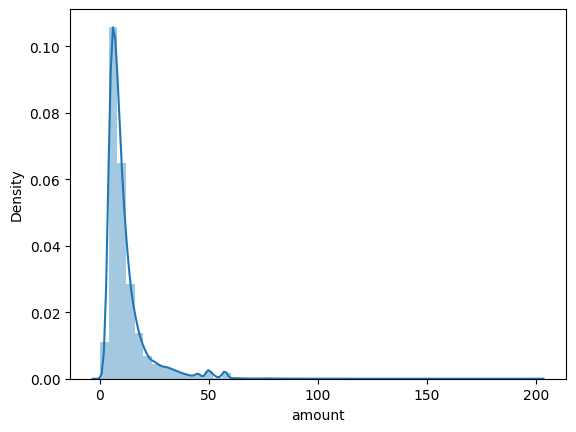

In [24]:
sns.distplot(df['amount'])
plt.show()

In [25]:
df.columns

Index(['unique_id', 'amount', 'date_time_of_pickup', 'longitude_of_pickup',
       'latitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff',
       'no_of_passenger'],
      dtype='object')

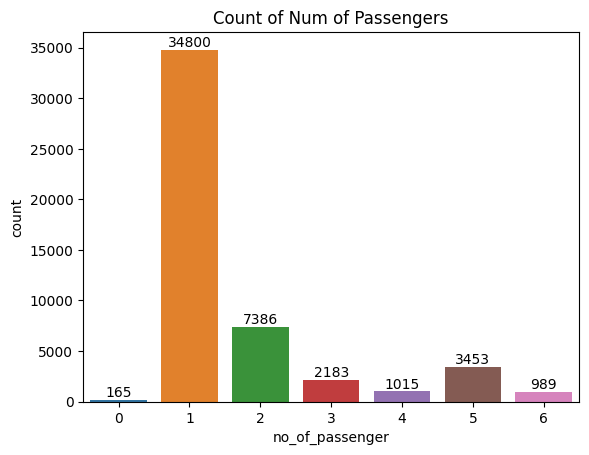

In [28]:
ax = sns.countplot(x=df['no_of_passenger'])
ax.bar_label(ax.containers[0])
plt.title('Count of Num of Passengers')
plt.show()

In [29]:
(165/499991)*100

0.03300059401069219

In [30]:
df = df[df['no_of_passenger']!=0]
df.shape

(49826, 8)

In [31]:
df.columns

Index(['unique_id', 'amount', 'date_time_of_pickup', 'longitude_of_pickup',
       'latitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff',
       'no_of_passenger'],
      dtype='object')

#### Rename the columns

In [32]:
df.columns = ['id','amount','pickup_datetime',
              'long_pickup','lat_pickup','long_drop','lat_drop','pass_count']
df.columns

Index(['id', 'amount', 'pickup_datetime', 'long_pickup', 'lat_pickup',
       'long_drop', 'lat_drop', 'pass_count'],
      dtype='object')

#### Note
1) Latitude ranges from -90 to 90.<br>
2) Longitude ranges from -180 to 180.

In [34]:
df.columns

Index(['id', 'amount', 'pickup_datetime', 'long_pickup', 'lat_pickup',
       'long_drop', 'lat_drop', 'pass_count'],
      dtype='object')

In [37]:
print(df[~df['lat_pickup'].between(-90,90)].shape)
print(df[~df['lat_drop'].between(-90,90)].shape)

(1, 8)
(0, 8)


In [38]:
print(df[~df['long_pickup'].between(-180,180)].shape)
print(df[~df['long_drop'].between(-180,180)].shape)

(0, 8)
(0, 8)


In [40]:
df = df[(df['lat_pickup']>=-90) & (df['lat_pickup']<=90)]
df.shape

(49825, 8)

In [41]:
df.describe()

,amount,long_pickup,lat_pickup,long_drop,lat_drop,pass_count
count,49825.000000,49825.000000,49825.000000,49825.000000,49825.000000,49825.000000
mean,11.373212,-72.510557,39.926937,-72.506896,39.927448,1.673437
std,9.693602,10.391455,6.011390,10.400148,6.011808,1.287799
min,0.010000,-75.423848,-74.006893,-84.654241,-74.006377,1.000000
25%,6.000000,-73.992066,40.734890,-73.991151,40.734378,1.000000
50%,8.500000,-73.981838,40.752685,-73.980087,40.753375,1.000000
75%,12.500000,-73.967145,40.767363,-73.963620,40.768162,2.000000
max,200.000000,40.783472,43.098708,40.851027,43.415190,6.000000


#### Compute Distance between Pickup and Drop Location

#### Distance Formula
Minkowski Distance(A(x1,y1),B(x2,y2))  = ( (|x2-x1|)^p + (|y2-y1|)^p ) ^(1/p), p is an int

Manhattan Distance(A(x1,y1),B(x2,y2))  =  |x2-x1| + |y2-y1|

Euclidean Distance(A(x1,y1),B(x2,y2))  =  sqrt((x2-x1)^2 + (y2-y1)^2)

In [45]:
def minkowski_dist(x1,x2,y1,y2,p):
    dist = (abs(x2-x1)**p + abs(y2-y1)**p)**(1/p)
    return dist

In [49]:
df['Manhattan_dist'] = minkowski_dist(df['lat_pickup'],df['lat_drop'],
                                      df['long_pickup'],df['long_drop'],1)
df['Euclidean_dist'] = minkowski_dist(df['lat_pickup'],df['lat_drop'],
                                      df['long_pickup'],df['long_drop'],2)
df.head()

,id,amount,pickup_datetime,long_pickup,lat_pickup,long_drop,lat_drop,pass_count,Manhattan_dist,Euclidean_dist
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,0.011742,0.009436
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,0.107481,0.079696
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,0.019212,0.013674
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,0.029386,0.025340
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,0.027194,0.019470


In [50]:
df['abs_lat_diff'] = abs(df['lat_pickup'] - df['lat_drop'])
df['abs_long_diff'] = abs(df['long_pickup'] - df['long_drop'])
df.head()

,id,amount,pickup_datetime,long_pickup,lat_pickup,long_drop,lat_drop,pass_count,Manhattan_dist,Euclidean_dist,abs_lat_diff,abs_long_diff
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,0.011742,0.009436,0.009041,0.002701
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,0.107481,0.079696,0.070701,0.036780
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,0.019212,0.013674,0.010708,0.008504
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,0.029386,0.025340,0.024949,0.004437
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,0.027194,0.019470,0.015754,0.011440


#### Haversine Distance

We can calulate the distance in a sphere when latitudes and longitudes are given by Haversine formula

haversine(θ) = sin²(θ/2)

Eventually, the formula boils down to the following where φ is latitude, λ is longitude, R is earth’s radius (mean radius = 6,371km) to include latitude and longitude coordinates (A and B in this case).
Latitude and longitude are measured in radians

a = sin²((φB - φA)/2) + cos φA . cos φB . sin²((λB - λA)/2)

c = 2 * atan2( √a, √(1−a) )

d = R ⋅ c

d = Haversine distance

<img src="haversine_dist.png">

In [52]:
!pip install haversine

#### Link to havesine 
https://pypi.org/project/haversine/

In [67]:
def haversine_dist(lon1, lat1, lon2, lat2):
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
    c = 2*np.arctan(np.sqrt(a),np.sqrt(1-a))
    km = 6378 * c
    return km

In [69]:
df['Haversine_dist'] = haversine_dist(df['long_pickup'],df['lat_pickup'],
                                     df['long_drop'],df['lat_drop'])
df.head(3)

,id,amount,pickup_datetime,long_pickup,lat_pickup,long_drop,lat_drop,pass_count,Manhattan_dist,Euclidean_dist,abs_lat_diff,abs_long_diff,Haversine_dist
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,0.011742,0.009436,0.009041,0.002701,1.031896
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,0.107481,0.079696,0.070701,0.036780,8.459416
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,0.019212,0.013674,0.010708,0.008504,1.391052


#### Generating Year, Quarter, Month, Day of Pickup

In [70]:
df['Year'] = df['pickup_datetime'].dt.year
df['Qtr'] = df['pickup_datetime'].dt.quarter
df['Month'] = df['pickup_datetime'].dt.month
df['Day'] = df['pickup_datetime'].dt.day
df.head()

,id,amount,pickup_datetime,long_pickup,lat_pickup,long_drop,lat_drop,pass_count,Manhattan_dist,Euclidean_dist,abs_lat_diff,abs_long_diff,Haversine_dist,Year,Qtr,Month,Day
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,0.011742,0.009436,0.009041,0.002701,1.031896,2009,2,6,15
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,0.107481,0.079696,0.070701,0.036780,8.459416,2010,1,1,5
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,0.019212,0.013674,0.010708,0.008504,1.391052,2011,3,8,18
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,0.029386,0.025340,0.024949,0.004437,2.802346,2012,2,4,21
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,0.027194,0.019470,0.015754,0.011440,2.001353,2010,1,3,9


In [71]:
df['Hour'] = df['pickup_datetime'].dt.hour
df.head()

,id,amount,pickup_datetime,long_pickup,lat_pickup,long_drop,lat_drop,pass_count,Manhattan_dist,Euclidean_dist,abs_lat_diff,abs_long_diff,Haversine_dist,Year,Qtr,Month,Day,Hour
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,0.011742,0.009436,0.009041,0.002701,1.031896,2009,2,6,15,17
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,0.107481,0.079696,0.070701,0.036780,8.459416,2010,1,1,5,16
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,0.019212,0.013674,0.010708,0.008504,1.391052,2011,3,8,18,0
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,0.029386,0.025340,0.024949,0.004437,2.802346,2012,2,4,21,4
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,0.027194,0.019470,0.015754,0.011440,2.001353,2010,1,3,9,7


In [73]:
df['Hour'].unique()

array([17, 16,  0,  4,  7,  9, 20, 13,  1, 11, 19, 12, 14, 18, 15,  6, 21,
       23,  3,  8, 10,  2, 22,  5], dtype=int64)

In [74]:
def hour_quarter(x):
    if x>0 and x<=6:
        return 1     # ' Late Night or Early_Morning'
    elif x>6 and x<=12:
        return 2    # 'Morning'
    elif x>12 and x<=18:
        return 3    # "Afternoon/Evening"
    else:
        return 4    # "Late Afternoon or Night"

In [75]:
df['Hour_Qtr'] = df['Hour'].apply(hour_quarter)

In [76]:
df['Hour_Qtr'].value_counts()

4    15910
3    14858
2    13521
1     5536
Name: Hour_Qtr, dtype: int64

In [ ]:
# is_weekday = (weekday=1,weekend=0)
# is_weekend = (weekday=0,weekend=1)

In [79]:
w = pd.DataFrame(pd.date_range(start='2023-12-18',end='2023-12-24'))
w.columns=['Date']
w['Dayof_Week'] = w['Date'].dt.dayofweek
w

,Date,Dayof_Week
0,2023-12-18,0
1,2023-12-19,1
2,2023-12-20,2
3,2023-12-21,3
4,2023-12-22,4
5,2023-12-23,5
6,2023-12-24,6


In [80]:
df['Is_Weekend'] = np.where(df['pickup_datetime'].dt.dayofweek.isin([5,6]),1,0)
df.head()

,id,amount,pickup_datetime,long_pickup,lat_pickup,long_drop,lat_drop,pass_count,Manhattan_dist,Euclidean_dist,abs_lat_diff,abs_long_diff,Haversine_dist,Year,Qtr,Month,Day,Hour,Hour_Qtr,Is_Weekend
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,0.011742,0.009436,0.009041,0.002701,1.031896,2009,2,6,15,17,3,0
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,0.107481,0.079696,0.070701,0.036780,8.459416,2010,1,1,5,16,3,0
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,0.019212,0.013674,0.010708,0.008504,1.391052,2011,3,8,18,0,4,0
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,0.029386,0.025340,0.024949,0.004437,2.802346,2012,2,4,21,4,1,1
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,0.027194,0.019470,0.015754,0.011440,2.001353,2010,1,3,9,7,2,0


In [84]:
df.shape

(49825, 20)

In [85]:
df.columns

Index(['id', 'amount', 'pickup_datetime', 'long_pickup', 'lat_pickup',
       'long_drop', 'lat_drop', 'pass_count', 'Manhattan_dist',
       'Euclidean_dist', 'abs_lat_diff', 'abs_long_diff', 'Haversine_dist',
       'Year', 'Qtr', 'Month', 'Day', 'Hour', 'Hour_Qtr', 'Is_Weekend'],
      dtype='object')

In [86]:
df.isnull().sum()

id                 0
amount             0
pickup_datetime    0
long_pickup        0
lat_pickup         0
long_drop          0
lat_drop           0
pass_count         0
Manhattan_dist     0
Euclidean_dist     0
abs_lat_diff       0
abs_long_diff      0
Haversine_dist     0
Year               0
Qtr                0
Month              0
Day                0
Hour               0
Hour_Qtr           0
Is_Weekend         0
dtype: int64

### EDA

In [51]:
df.groupby(['Year'])['amount'].agg(['min','max','mean','median','var','std'])

,min,max,mean,median,var,std
Year,,,,,,
2009,2.50,165.00,10.049168,7.7,71.353437,8.447096
2010,2.50,143.00,10.141539,7.7,70.639480,8.404730
2011,2.50,96.00,10.481042,7.7,72.116932,8.492169
2012,2.50,200.00,11.244782,8.5,93.934069,9.691959
2013,2.50,180.00,12.443361,9.5,108.729506,10.427344
2014,2.50,165.00,13.140996,9.5,127.952862,11.311625
2015,0.01,96.25,13.076379,9.5,116.383551,10.788121


In [52]:
def feature_desc_wrt_amount(feat):
    feat_desc = df.groupby([feat])['amount'].agg(['min','max','mean','median','count'])
    plt.figure(figsize=(14,4))
    plt.subplot(1,2,1)
    sns.countplot(x=df[feat],
                  order=df[feat].value_counts().sort_values(ascending=False).index)
    plt.title(f'Countplot for {feat}')
    plt.xticks(fontsize=8)
    
    plt.subplot(1,2,2)
    sns.boxplot(x=df[feat],y=df['amount'])
    plt.title(f'Boxplot for Amount wrt {feat}')
    return feat_desc 